In [28]:
# Importing and initializing
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

node_df = pd.read_csv("2024_05_05_meta_node_data.csv")
edge_df = pd.read_csv("2024_04_24_meta_edge_sourcetarget_disease_pub_pli_reciprocal.csv")
nonOMIM_graph = nx.Graph()

/var/folders/6q/0qnxsny943385fwzz738241c0000gn/T/ipykernel_62951/1982499811.py:7: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  edge_df = pd.read_csv("2024_04_24_meta_edge_sourcetarget_disease_pub_pli_reciprocal.csv")


In [29]:
node_df.set_index('id',inplace=True)
node_df.head()


,symbol,disease_assoc_cat,publication_count,ortholog_count,all_ortho_count
id,,,,,
7414,VCL,disease_assoc,279,5,"{'hsapien': {'entrezid': 7414, 'symbol': 'VCL'..."
4626,MYH8,disease_assoc,36,4,"{'hsapien': {'entrezid': 4626, 'symbol': 'MYH8..."
9722,NOS1AP,disease_assoc,141,5,"{'hsapien': {'entrezid': 9722, 'symbol': 'NOS1..."
9891,NUAK1,non_disease_assoc,70,5,"{'hsapien': {'entrezid': 9891, 'symbol': 'NUAK..."
81788,NUAK2,disease_assoc,46,2,"{'hsapien': {'entrezid': 81788, 'symbol': 'NUA..."


In [26]:
edge_df.head()

,source_target_key,source,source_symbol,target,target_symbol,interaction_cat,interaction_method,interaction_type,interaction_type_cat,interaction_source,interaction_count,all_mo_count,source_disease_assoc_cat,target_disease_assoc_cat,source_publication_count,target_publication_count,publication_count,source_pli,target_pli,reciprocal
0,7414;88,7414,VCL,88,ACTN2,physical,none,association,NaN,WormBase,1,"{'hsapien': 0, 'celegans': 1, 'mmusculus': 0, ...",disease_assoc,disease_assoc,279,150,429,0.9985,9.999600e-01,False
1,7414;1739,7414,VCL,1739,DLG1,physical,none,association,NaN,WormBase,1,"{'hsapien': 0, 'celegans': 1, 'mmusculus': 0, ...",disease_assoc,non_disease_assoc,279,282,561,0.9985,9.870900e-01,False
2,7414;1742,7414,VCL,1742,DLG4,physical,none,association,NaN,WormBase,1,"{'hsapien': 0, 'celegans': 1, 'mmusculus': 0, ...",disease_assoc,disease_assoc,279,251,530,0.9985,1.000000e+00,False
3,7414;1740,7414,VCL,1740,DLG2,physical,none,association,NaN,WormBase,1,"{'hsapien': 0, 'celegans': 1, 'mmusculus': 0, ...",disease_assoc,non_disease_assoc,279,95,374,0.9985,9.997500e-01,False
4,7414;7402,7414,VCL,7402,UTRN,physical,none,association,NaN,WormBase,1,"{'hsapien': 0, 'celegans': 1, 'mmusculus': 0, ...",disease_assoc,non_disease_assoc,279,167,446,0.9985,1.757100e-47,True


In [83]:
# Making a list of all non_omim genes
non_omim_genes = []
for index, row in node_df.iterrows():
    if row['disease_assoc_cat'] == 'non_omim':
        non_omim_genes.append(index)
    else:
        pass

print(len(non_omim_genes))

3647


In [44]:
# Finding all edges that have a non_omim node
non_omim_edges = []
for index, row in edge_df.iterrows():
    if row['source'] in non_omim_genes:
        edge = row['source_target_key']
        non_omim_edges.append(edge)
    elif row['target'] in non_omim_genes:
        edge = row['source_target_key']
        non_omim_edges.append(edge)
    else:
        pass

In [46]:
# Convert each edge to a tuple and put it in a list
non_omim_edge_list = list(map(edge_tuples, non_omim_edges))
print(non_omim_edge_list)

[(7414, 102724652), (7414, 196446), (4626, 196446), (9526, 390010), (9526, 376940), (9526, 340260), (1288, 222194), (5430, 131149), (3217, 503582), (3203, 503582), (3204, 503582), (3223, 503582), (3216, 503582), (3222, 503582), (23309, 390010), (1258, 100996758), (9271, 389813), (7486, 54932), (90459, 149699), (22803, 91368), (22803, 91368), (5563, 91408), (10978, 55094), (9532, 124923), (9532, 102724652), (3337, 55466), (11080, 55466), (55466, 27161), (55466, 22809), (55466, 468), (55466, 55124), (55466, 192670), (55466, 26523), (55466, 192669), (55466, 3337), (55466, 11080), (55466, 160622), (55466, 3066), (55466, 6749), (55466, 3312), (55466, 5931), (55466, 5928), (55466, 64332), (55466, 84807), (55466, 55051), (55466, 51135), (55466, 5347), (55466, 9271), (93974, 196446), (10963, 91408), (658, 353500), (658, 3626), (658, 81619), (93, 81619), (139065, 389813), (11081, 389813), (196, 100996758), (196, 390010), (196, 390010), (5015, 653269), (5015, 653781), (150280, 340260), (328, 855

In [82]:
print(len(nonOMIM_graph.edges))

31977


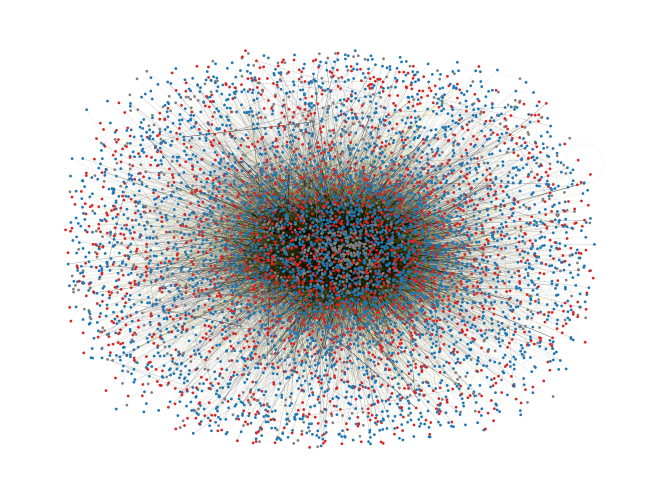

<Figure size 10000x5000 with 0 Axes>

In [90]:
# Spring layout
nonOMIM_graph.add_edges_from(non_omim_edge_list)
pos = nx.spring_layout(nonOMIM_graph, k=1/15, iterations=15, scale=1)
nx.draw(nonOMIM_graph, pos, with_labels=False, width = edge_widths, edge_color = edge_colors_int_type, node_color=node_colors, node_size=1) # font_size = 10, font_color='black')
plt.figure(figsize=(100, 50))
plt.show()

In [ ]:
# Organized by color
nonOMIM_graph.add_edges_from(non_omim_edge_list)
pos = nx.multipartite_layout(nonOMIM_graph, subset_key='category', align='vertical', scale=1)
nx.draw(nonOMIM_graph, pos, with_labels=False, width = 0.01, node_color=node_colors, node_size=5) # font_size = 10, font_color='black')
plt.figure(figsize=(100, 50))
plt.show()

In [43]:
# Taking the first edges and constructing a directed graph
# This method would only work if you take the nodes in order because the index of edge_list and edge_df (and first_edges) must match
# Otherwise, the for loop would not work properly and the arrows would be wrong

# Take the first edges -- this is a list
first_edges = list(edge_df.iloc[:100]['source_target_key'])

# Convert each edge into a tuple

edge_tuples = lambda x: tuple(map(int,x.split(';')))

# Put all those tuples in a list
edge_list = list(map(edge_tuples, first_edges))

# This is a list of all the edges reversed (it will be used in the for loop below)
reverse_edge_list = [(b,a) for (a,b) in edge_list]

# Adjusting the len(edge_list) to match the indicies of edge_list
edge_list_length = len(edge_list)
edge_list_length = edge_list_length - 1

# Finding if the 'reciprocal' value is True or False -- determines the direction of the edges
for index,edge in enumerate(edge_list):
    if index < edge_list_length:
        reciprocal = edge_df.iloc[index]['reciprocal']

        if reciprocal == True:
            reversed_edge = reverse_edge_list[index]
            edge_list.append(reversed_edge)
        else:
            pass
    else:
        pass


['7414;88', '7414;1739', '7414;1742', '7414;1740', '7414;7402', '7414;1756', '7414;26059', '7414;54514', '7414;1495', '7414;1496', '7414;3315', '7414;1410', '7414;102724652', '7414;1409', '7414;4001', '7414;5594', '7414;196446', '7414;139065', '7414;11081', '7414;23271', '7414;5829', '7414;7341', '4626;26059', '4626;2079', '4626;54514', '4626;3708', '4626;11337', '4626;29895', '4626;4634', '4626;140465', '4626;4624', '4626;745', '4626;196446', '4626;54784', '4626;139065', '4626;11081', '4626;7341', '4626;6709', '4626;7316', '9722;324', '9722;26059', '9722;2138', '9722;758', '9722;4026', '9891;4619', '9891;4622', '9891;4626', '81788;4619', '81788;4622', '81788;4626', '9891;26059', '9891;54514', '9891;5931', '9891;5928', '81788;26059', '81788;54514', '81788;5931', '81788;5928', '83892;57649', '83892;1052', '83892;89884', '83892;3175', '83892;390874', '83892;63950', '83892;132660', '83892;254251', '83892;678', '83892;677', '83892;7538', '83892;1857', '83892;1855', '83892;1856', '83892;706

In [ ]:
# # Visualization of the graph without colors
# nonOMIM_graph.add_edges_from(edge_list)
# nx.draw(nonOMIM_graph, with_labels=True)
# plt.figure(2)
# plt.figure(figsize=(50, 50))
# plt.show()

In [51]:
# Coloring the nodes as per disease_assoc_cat

# Creating a dictionary that assigns nodes to their disease association in a dict
nodes_list = list(nonOMIM_graph.nodes)

disease_cat_dict = {}

for node in nodes_list:
    disease_assoc_cat = node_df.loc[node]['disease_assoc_cat']
    if disease_assoc_cat == 'disease_assoc':
        disease_cat_dict[node] = {'category':'disease_assoc'}
    elif disease_assoc_cat == 'non_disease_assoc':
        disease_cat_dict[node] = {'category':'non_disease_assoc'}
    elif disease_assoc_cat == 'non_omim':
        disease_cat_dict[node] = {'category':'non_omim'}
    else:
        print ('failed')

# Assigning the attrubutes to the nodes
nx.set_node_attributes(nonOMIM_graph, disease_cat_dict)

# Creating a color map for the categories to colors
node_color_map = {'disease_assoc':'tab:red', 'non_disease_assoc':'tab:blue','non_omim':'gray'}
node_colors = [node_color_map[nonOMIM_graph.nodes[node]['category']] for node in nonOMIM_graph.nodes]

# nonOMIM_graph.add_edges_from(edge_list)
# pos = nx.spring_layout(nonOMIM_graph, k=0.7, iterations=15)
# nx.draw(nonOMIM_graph, pos, with_labels=False, width = 0.7, node_color=node_colors, node_size=50, font_size = 10, font_color='black')
# plt.figure(figsize=(100, 50))
# plt.show()

In [78]:
# Coloring edges as per interaction_type (6 categories done by GPT)

# GPT's 6 sections of the 84 items
genetic_interactions = ['cisphenotypic genetic ','mutual genetic over-su','association', 'genetic interaction', 'genetic suppression', 'genetic suppression (p', 'genetic suppression (c', 'genetic enhancement', 'genetic epistasis (sen', 'phenotypic suppression', 'asynthetic genetic int', 'cisphenotypic co-suppr', 'opposing genetic epist', 'minimal genetic epista', 'synthetic growth defec', 'transphenotypic enhanc', 'transphenotypic geneti', 'genetic over-suppressi', 'negative genetic inter', 'positive genetic inter']
physical_interactions = ['self interaction','physical association', 'direct interaction', 'colocalization', 'proximity', 'protein cleavage', 'disulfide bond', 'Co-localization', 'Co-fractionation', 'Co-purification', 'Co-crystal Structure', 'Protein-peptide', 'Protein-RNA']
post_translational_modifications = ['demethylation reaction', 'phosphorylation reacti', 'acetylation reaction', 'covalent binding', 'cleavage reaction', 'dephosphorylation reac', 'ubiquitination reactio', 'methylation reaction', 'deacetylation', 'cleavage', 'dephosphorylation', 'methylation', 'ubiquitination', 'deformylation reaction']
experimental_methods = ['Affinity Capture-RNA', 'Affinity Capture-Weste', 'Affinity Capture-MS', 'Two-hybrid', 'Biochemical Activity', 'Reconstituted Complex', 'Negative Genetic', 'Positive Genetic', 'PCA', 'FRET', 'Proximity Label-MS', 'Far Western', 'Affinity Capture-Lumin']
synthetic_rescue_and_dosage_interactions = ['synthetic genetic inte', 'mutual genetic enhance', 'maximal genetic epista', 'synthetic rescue (sens', 'dosage rescue (sensu B', 'synthetic rescue (sens', 'synthetic lethality (s', 'synthetic haploinsuffi', 'dosage rescue (sensu b', 'dosage growth defect (', 'Synthetic Rescue', 'Synthetic Lethality', 'Dosage Lethality', 'Dosage Rescue',  'Dosage Growth Defect', 'Synthetic Growth Defec', 'Synthetic Haploinsuffi']
phenotypic_interactions = ['monophenotypic genetic', 'phenotypic enhancement', 'putative self interact', 'cisphenotypic inter-su', 'cisphenotypic inter-suppr', 'Phenotypic Suppression', 'Phenotypic Enhancement']

# Creating a dict that assigns each interaction_type to its respective section
interaction_section_dict = {}

for index, edge in enumerate(nonOMIM_graph.edges):
    interaction_type = edge_df.loc[index]['interaction_type']
    #print(interaction_type)
    if interaction_type in genetic_interactions:
        interaction_section_dict[edge] = {'category':'Genetic Interaction'}
    elif interaction_type in physical_interactions:
        interaction_section_dict[edge] = {'category':'Physical Interaction'}
    elif interaction_type in post_translational_modifications:
        interaction_section_dict[edge] = {'category':'Post Translational Modification'}
    elif interaction_type in experimental_methods:
        interaction_section_dict[edge] = {'category':'Experimental Method'}
    elif interaction_type in synthetic_rescue_and_dosage_interactions:
        interaction_section_dict[edge] = {'category':'Synthetic Rescue and Dosage Interaction'}
    elif interaction_type in phenotypic_interactions:
        interaction_section_dict[edge] = {'category':'Phenotypic Interaction'}
    else:
        print('failed')

# Assigning attributes to edge
nx.set_edge_attributes(nonOMIM_graph, interaction_section_dict)

# Creating a color map that maps each section to a color
edge_section_color_map = {'Genetic Interaction':'orange', 'Physical Interaction':'yellow', 'Post Translational Modification':'green','Experimental Method':'purple','Synthetic Rescue and Dosage Interaction':'pink','Phenotypic Interaction':'black'}
edge_colors_int_section = [edge_section_color_map[nonOMIM_graph.edges[edge]['category']] for edge in nonOMIM_graph.edges]


In [80]:
# Coloring the edges as per interaction_type - 5 most common types

interaction_type_dict = {}
for index, edge in enumerate(nonOMIM_graph.edges):
    interaction_type = edge_df.loc[index]['interaction_type']
    if interaction_type == 'Negative Genetic':
        interaction_type_dict[edge] = {'category':'Negative Genetic'}
    elif interaction_type == 'physical association':
        interaction_type_dict[edge] = {'category':'physical association'}
    elif interaction_type == 'Affinity Capture-MS':
        interaction_type_dict[edge] = {'category':'Affinity Capture-MS'}
    elif interaction_type == 'direct interaction':
        interaction_type_dict[edge] = {'category':'direct interaction'}
    elif interaction_type == 'Positive Genetic':
        interaction_type_dict[edge] = {'category':'Positive Genetic'}
    else:
        interaction_type_dict[edge] = {'category':'other'}

# Assigning attributes to edge
nx.set_edge_attributes(nonOMIM_graph, interaction_type_dict)

# Creating a color map to map the interaction types to colors
edge_type_color_map = {'Negative Genetic':'orange','physical association':'yellow','Affinity Capture-MS':'green','direct interaction':'purple', 'Positive Genetic':'pink', 'other':'black'}
edge_colors_int_type = [edge_type_color_map[nonOMIM_graph.edges[edge]['category']]for edge in nonOMIM_graph.edges]

In [75]:
# Coloring the edges as per interaction_cat

# Creating a dictionary that assigns edges to their interaction_cat in a dict
interaction_cat_dict = {}
for index,edge in enumerate(nonOMIM_graph.edges):
    interaction_cat = edge_df.loc[index]['interaction_cat']
    if interaction_cat == 'physical':
        interaction_cat_dict[edge] = {'category':'physical'}
    elif interaction_cat == 'genetic':
        interaction_cat_dict[edge] = {'category':'genetic'}
    else:
        print('failed')

# Assigning attributes to edge
nx.set_edge_attributes(nonOMIM_graph, interaction_cat_dict)

# Creating a color map for the categories to colors
edge_cat_color_map = {'physical':'orange', 'genetic':'green'}
edge_colors_int_cat = [edge_cat_color_map[nonOMIM_graph.edges[edge]['category']] for edge in nonOMIM_graph.edges]


In [85]:
# Making the thickness of the edges correspond to interaction_count

# Creating a dictionary that assigns edges to their interaction_count in a dict
interaction_count_dict = {}
for index, edge in enumerate(nonOMIM_graph.edges):
    interaction_count = edge_df.iloc[index]['interaction_count']
    if interaction_count == 1:
        interaction_count_dict[edge] = {'count':1}
    elif interaction_count == 2:
        interaction_count_dict[edge] = {'count':2}
    elif interaction_count == 3:
        interaction_count_dict[edge] = {'count':3}
    elif interaction_count == 4:
        interaction_count_dict[edge] = {'count':4}
    elif interaction_count == 5:
        interaction_count_dict[edge] = {'count':5}
    elif interaction_count == 6:
        interaction_count_dict[edge] = {'count':6}
    else:
        print('failed')

# Assigning attributes to edge
nx.set_edge_attributes(nonOMIM_graph, interaction_count_dict)

# Creating a width map for the categories to colors
edge_width_map = {1:0.02,2:0.07,3:.12,4:.17,5:.22,6:.27}  # thinner
# edge_width_map = {1:0.2,2:0.7,3:1.2,4:1.7,5:2.2,6:2.7}   # thicker
edge_widths = [edge_width_map[nonOMIM_graph.edges[edge]['count']] for edge in nonOMIM_graph.edges]

print(len(edge_widths))
print(len(edge_colors_int_cat))
print(len(nonOMIM_graph.edges))
print(len(edge_list))

print(len(nonOMIM_graph.nodes))
print(len(node_colors))



31977
31977
31977
123
6890
6890


In [ ]:
# # Relabeling the nodes so their labels are genes, not ids --  not needed anymore
# ids_to_genes = {}

# for node in nodes_list:
#     id_gene = node_df.loc[node]['symbol']
#     ids_to_genes[node] = id_gene